# Menganalisis Risiko Gagal Bayar Peminjam

Tugas nya adalah menyiapkan laporan untuk divisi kredit suatu bank. mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman.

Laporan ini akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

## Buka *file* data dan baca informasi umumnya.

In [1]:
# Muat semua *library*
import pandas as pd

# Muat datanya
df = pd.read_csv('/content/credit_scoring_eng.csv')

## Soal 1. Eksplorasi data

**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah memiliki hutang pembayaran pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

In [2]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
df.shape


(21525, 12)

In [3]:
# Mari tampilkan N baris pertama
df.head(5)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


Di kolom **days_employed** memiliki nilai minus(-) dan bertype float, yang seharusnya bertipe integer dikarenakan days_employed adalah pengalaman kerja dalam hari 

In [4]:
# Dapatkan informasi data
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Jumlah total baris adalah 21525, tetapi  di bagian kolom **days_employed dan total income** memiliki nilai yang hilang. dan juga pada kolom **days_employed** bertype float64

In [5]:
# Mari kita lihat tabel yang difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
df[df['days_employed'].isna()].head(1)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding


Jumlah total baris adalah 21525, tetapi  di bagian kolom **days_employed dan total income** memiliki nilai yang hilang sebanyak 2174.

sekarang diperlukan filtering atau melihat lebih lanjut data yang hilang tersebut disengaja atau tidak. dikarenakan pada kolom days_employed dan total_income memiliki nilai hilang yang sama.

In [6]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
df_isna = df[(df['days_employed'].isna()) | (df['total_income'].isna())].fillna(0)
df_isna[('days_employed')].count()

2174

**Kesimpulan sementara**
jumlah baris dalam tabel yang telah di filter sesuai dengan jumlah nilai yang hilang.
menandakan bahwa nilai yang hilang pada **days_employed dan total_income** simetris

In [7]:
persentase = df_isna['days_employed'].count() / df['debt'].count()
print(f'persentase nilai yang hilang adalah : {persentase:.0%}')

persentase nilai yang hilang adalah : 10%


nilai yang hilang sampai 10% dari seluruh data, nilai yang cukup besar.

coba kita cari lebih dalam mengapa banyak sekali nilai yang hilang dengan mengkategorikan nilai yang hilang dengan kolom **education_id dan family_status**.

In [8]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
# Membandingkan nilai yang hilang dengan type pekerjaan
df_isna.groupby(['education_id','family_status'])['days_employed'].count().sort_values(ascending=False)

education_id  family_status    
1             married              891
              civil partnership    320
0             married              306
1             unmarried            166
0             civil partnership    102
              unmarried            100
1             divorced              83
              widow / widower       80
2             married               30
0             divorced              24
2             unmarried             20
              civil partnership     14
0             widow / widower       12
3             married               10
              civil partnership      6
2             divorced               5
3             widow / widower        3
              unmarried              2
Name: days_employed, dtype: int64

sekarang kita membandingkan nilai yang hilang dengan kolom **debt**

In [9]:
# Periksalah distribusinya
# Membandingkan nilai yang hilang dengan debt
df_isna.groupby('debt')['days_employed'].count()


debt
0    2004
1     170
Name: days_employed, dtype: int64

1. Setelah melakukan perhitungan distribusi nilai yang hilang terhadap kolom debt, di dapat hampir 90% data hilang adalah nasabah yang tidak memiliki hutang pembayaran pinjaman
2. jika nilai perhitungan distribusi nilai yang hilang terhadap kolom **education_id dan family_status** di dapat nilai hilang berstatus married memiliki jumlah yang paling banyak, 

**Kemungkinan penyebab hilangnya nilai dalam data adalah seorang ibu rumah tangga yang tidka memiliki pengalaman bekerja dan total_income**, tapi ini masih kemungkinan sementara, kita coba menggali lebih dalam tentang data yang hilang


In [10]:
# Memeriksa distribusi di seluruh *dataset*
df.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


**Kesimpulan sementara**

Distribusi dalam *dataset* yang asli mirip dengan distribusi tabel yang telah difilter, menandakan bahwa sebagian besar data yang hilang adalah top frekuensi di tabel nya.

In [11]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
df_isna.groupby('income_type')['days_employed'].count().sort_values(ascending=False)



income_type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: days_employed, dtype: int64

**Kesimpulan sementara**
menurut data yang ada kemungkinan besar bahwa nilai yang hilang adalah suatu ketidak sengajaan 

In [12]:
df_isna.groupby('gender').count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,income_type,debt,total_income,purpose
gender,,,,,,,,,,,
F,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484
M,690,690,690,690,690,690,690,690,690,690,690


In [13]:
# Periksa pola lainnya - jelaskan pola tersebut
# menghitung ketiga kolom dengan hasil tertinggi di setiap kolom nya dan hitung jumlah nya
df_isna[(df_isna['debt'] == 0) & (df_isna['gender'] == 'F') & (df_isna['family_status'] =='married')].count()

children            755
days_employed       755
dob_years           755
education           755
education_id        755
family_status       755
family_status_id    755
gender              755
income_type         755
debt                755
total_income        755
purpose             755
dtype: int64

**Kesimpulan**

Setelah menggabung kan ketiga kategori yang memiliki persentase di atas 50% pada nilai yang hilang, di dapat bahwa : **Nasabah yang berjenis kelamin Perempuan, sudah married dan tidak memiliki hutang** mendapatkan 755 nilai hilang setara 35% data nilai yang hilang. kemungkinan adalah seorang ibu rumah tangga yang tidak memiliki pengalaman kerja dan pendapatan bulanan.

Selanjutnya diperlukan untuk memperbaiki penulisan dan memperbaiki kesalahan input pada data asli.

## Transformasi data
melihat nilai unique pada kolom education dan memperbaiki nya dengan membuat seluruh kata menjadi lower capital

In [14]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [15]:
# Perbaiki pencatatan jika diperlukan
df['education'] = df['education'].str.lower()

In [16]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
df['education'].unique()


array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [17]:
# Mari kita lihat distribusi nilai pada kolom `children`
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])


dalam kolom children memiliki nilai yang sedikit aneh, seperti -1, dan 20. bukan kah sedikit luar biasa jika memiliki 20 anak, apakah ada kesalahan input, kemungkinan -1 seharusnya di isi 1 dan 20 seharusnya 2.

In [18]:
# [perbaiki data berdasarkan keputusan Anda]
df.loc[df['children'] == 20, 'children'] = 2
df.loc[df['children'] == -1, 'children'] = 1

In [19]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
df['children'].unique()


array([1, 0, 3, 2, 4, 5])

In [20]:
# Temukan data yang bermasalah di `days_employed`, jika memang terdapat masalah, dan hitung persentasenya
print(df['days_employed'].unique())
persentase_negatif_days = df[df['days_employed'] < 0]['days_employed'].count() / df['days_employed'].count()
print(f'persentase nilai negatif nya adalah : {persentase_negatif_days:.0%}')
persentase_over_days = df[df['days_employed'] > 28480]['days_employed'].count() / df['days_employed'].count()
print(f'persentase nilai di atas 28480 hari atau 80 tahun: {persentase_over_days:.0%}')

[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]
persentase nilai negatif nya adalah : 82%
persentase nilai di atas 28480 hari atau 80 tahun: 18%


Jumlah data yang negatif pada kolom **days_employed** adalah 15906 data atau 82% dari keseluruhan data

Jumlah data yang diatas 28480 hari atau 80 tahun adalah 3445 data atau 18% dari keseluruhan data.
jika di total 90% data pada kolom days_employed bermasalah.



In [21]:
# Atasi nilai yang bermasalah, jika ada
#merubah nilai yang hilang menjadi 0
df['days_employed'] = df['days_employed'].fillna(0)
#merubah nilai negatif menjadi positif atau bilangan riil
df['days_employed'] = abs(df['days_employed'].astype('int64'))

untuk nilai data **days_employed** yang melebihi 28480 atau 80 tahun pengalam akan dirubah sesuai dengan umur nasabah dikurang 17 tahun, (karna 17 tahun adalah batas wajar seseorang untuk bekerja).

In [22]:
#membuat fungsi untuk mengubah nilai days_employed yang melebih 28480
def days_employed_over(row):
    day = row['days_employed']
    selisih_umur = row['dob_years']
    if day >= 28480:
        return (selisih_umur - 17) * 356
    return day

In [23]:
#test fungsi
test_data4 = {'days_employed' : [28490, 100 , 300000], 
              'dob_years' : [50,20,35]}
test_data5 = pd.DataFrame(test_data4)
test_data5['days_employed'] = test_data5.apply(days_employed_over, axis = 1)
test_data5.head()

,days_employed,dob_years
0,11748,50
1,100,20
2,6408,35


In [24]:
#saat nya memasukan fungsi ke data asli
df['days_employed'] = df.apply(days_employed_over, axis = 1)

In [25]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['days_employed'].unique()

array([8437, 4024, 5623, ..., 8799,  960, 9929])

In [26]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
print(df['dob_years'].unique())
persentase_dob_years = df[df['dob_years'] == 0]['dob_years'].count()/ df['dob_years'].count() * 100
print(f'persentase umur nasabah 0 : {float(persentase_dob_years)}%')


[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]
persentase umur nasabah 0 : 0.4692218350754936%



Dikarenakan persentase umur 0 pada nasabah hanya 0.4%, kita akan drop atau menghilangkan data tersebut.

In [27]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
df = df.drop(df[df['dob_years'] == 0].index)

In [28]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75])

In [29]:
# Mari kita lihat nilai untuk kolom ini
df['family_status'].unique()



array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

Dikarenakan nilai widow/widowe = divorce, kita akan gabungkan nilai tersebut

In [30]:
# Atasi nilai yang bermasalah di `family_status`, jika ada
# menggabungkan widow/widower dengan divorced
df['family_status'] = df['family_status'].replace('widow / widower', 'divorced')


In [31]:
# Periksa hasilnya - pastikan nilainya telah diperbaiki
df['family_status'].unique()

array(['married', 'civil partnership', 'divorced', 'unmarried'],
      dtype=object)

In [32]:
# Mari kita liat nilai dalam kolom ini
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [33]:
# Atasi nilai-nilai yang bermasalah, jika ada
df = df.drop(df[df['gender'] == 'XNA'].index)

dikarenakan kita tidak bisa menentukan apakah nasabah tersebut berjenis kelamin F atau M, dan juga nilai XNA hanya 1 data, maka kita akan drop/ hilangkan data nya.

In [34]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['gender'].unique()


array(['F', 'M'], dtype=object)

In [35]:
# Mari kita lihat nilai dalam kolom ini
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

business dan entrepreneur secara garis besar memiliki arti yang sama, maka akan di digabungkan menjadi entrepreneur,
student dan unemployed secara garis besar sama sama tidak bekerja, maka akan di gabungkan menjadi unemployed
employee dan civil servant secara garis besar sama sama bekerja, maka akan di gabungkan menjadi employee

In [36]:
# Atasi nilai yang bermasalah, jika ada
df['income_type'] = df['income_type'].replace('business', 'entrepreneur')
df['income_type'] = df['income_type'].replace('student', 'unemployed')
df['income_type'] = df['income_type'].replace('civil servant', 'employee')

In [37]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['income_type'].unique()


array(['employee', 'retiree', 'entrepreneur', 'unemployed',
       'paternity / maternity leave'], dtype=object)


untuk data duplikat, dikarenakan dalam data tidak ada user id ataupun suatu kolom yang bisa membedakan antara nasabah 1 dan yang lain,maka data duplikat akan kita biarkan.

In [38]:
# Periksa duplikat
df.duplicated().sum()


74

In [39]:
# Atasi duplikat, jika ada
df = df.drop_duplicates()

In [40]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
df.duplicated().sum()

0

In [41]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
df.shape

(21349, 12)


dalam dataset yang baru memiliki beberapa perubahan seperti :

1. baris yang awal 21525 menjadi 21423 baris, dikarenakan ada data yang drop.
2. kolom income_type yang awalnya memiliki 8 jenis nilai unique, menjadi 5 jenis nilai unique
3. kolom family_status yang awalnya memiliki 6 jenis nilai unique, menjadi 5 jenis nilai unique
4. kolom children yang memiliki nilai -1 dan 20, dirubah menjadi 1 dan 2
5. kolom days_employed yang memiliki nilai negatif dirubah menjadi bilangan rill


# Bekerja dengan nilai yang hilang

In [42]:
# Temukan dictionary
#dictionary education
education_dict = df[['education_id', 'education']]
education_dict= education_dict.drop_duplicates().reset_index(drop=True)
education_dict

,education_id,education
0,0,bachelor's degree
1,1,secondary education
2,2,some college
3,3,primary education
4,4,graduate degree


In [43]:
#dictionary status
status_dict = df[['family_status','family_status_id']]
status_dict = status_dict.drop_duplicates().reset_index(drop=True)
status_dict

,family_status,family_status_id
0,married,0
1,civil partnership,1
2,divorced,2
3,divorced,3
4,unmarried,4


### Memperbaiki nilai yang hilang di `total_income`


kita akan membuat kategori usia berdasarkan badan statistik.


In [44]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def age_group(age):
    if 14 < age < 26:
        return 'muda'
    elif 24 < age < 35:
        return 'pekerja awal'
    elif 34 < age < 45:
        return 'paruh baya'
    elif 44 < age < 55:
        return 'pra pensiun'
    elif 54 < age :
        return 'pensiun'
    

In [45]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
age_group(35) 

'paruh baya'

In [46]:
# Buatlah kolom baru berdasarkan fungsi
df['age_group'] = df['dob_years'].apply(age_group)


In [47]:
df['age_group'].value_counts()

paruh baya      5740
pra pensiun     4865
pensiun         4778
pekerja awal    4735
muda            1231
Name: age_group, dtype: int64

In [48]:
# Periksa bagaimana nilai di dalam kolom baru
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,paruh baya
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,paruh baya
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,pekerja awal
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,pekerja awal
4,0,12816,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,pra pensiun


In [49]:
df_drop = df.dropna()
df_drop.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,paruh baya
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,paruh baya
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,pekerja awal
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,pekerja awal
4,0,12816,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,pra pensiun


In [50]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
pd.pivot_table(df_drop,
               index='age_group',
               values = 'total_income',
               margins = True,
               aggfunc = 'mean'
                   )

,total_income
age_group,
muda,23447.795802
paruh baya,28728.607395
pekerja awal,27503.677524
pensiun,24020.064683
pra pensiun,27385.188219
All,26794.133121


In [51]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
pd.pivot_table(df_drop,
               index='age_group',
               values = 'total_income',
               margins = True,
               aggfunc = 'median'
                   )

,total_income
age_group,
muda,21423.8355
paruh baya,24818.4925
pekerja awal,24109.4560
pensiun,20770.9375
pra pensiun,23657.7945
All,23200.8770



setelah mengetahui nilai rata rata dan median nya dari kategori total_income, sekarang tambahkan kategori income_type. 



In [52]:
pd.pivot_table(df_drop,
               index='age_group',
               columns ='income_type',
               values = 'total_income',
               margins = True,
               aggfunc = 'median'
                   )
#median income_type dan total_income dari kategori age_group

income_type,employee,entrepreneur,paternity / maternity leave,retiree,unemployed,All
age_group,,,,,,
muda,20780.2140,22814.5995,NaN,14298.9760,15712.260,21423.8355
paruh baya,23275.4145,28489.5290,8612.661,19910.4685,NaN,24818.4925
pekerja awal,22982.7475,27663.1280,NaN,15378.5635,9593.119,24109.4560
pensiun,23450.6005,27476.8095,NaN,18795.8360,NaN,20770.9375
pra pensiun,22720.4365,28648.3635,NaN,19904.2120,32435.602,23657.7945
All,22928.4975,27564.8930,8612.661,18969.1490,15712.260,23200.8770


In [53]:
pd.pivot_table(df_drop,
               index='age_group',
               columns ='income_type',
               values = 'total_income',
               aggfunc = 'mean'
                   )
#mean income_type dan total_income dari kategori age_group

income_type,employee,entrepreneur,paternity / maternity leave,retiree,unemployed
age_group,,,,,
muda,22443.866609,25713.363026,NaN,14298.976000,15712.260
paruh baya,26651.734105,33992.827968,8612.661,23344.197000,NaN
pekerja awal,25861.677893,31689.163509,NaN,19271.650143,9593.119
pensiun,27003.395521,31741.233346,NaN,21685.425047,NaN
pra pensiun,25890.825462,33433.368529,NaN,23115.773065,32435.602



setelah ditinjau antara nilai median dan mean, kita akan ambil median untuk mengisi nilai kosong, dikarenakan nilai mean(rata-rata) melebihi dari nilai median, yang kemungkinan disebabkan ada nilai yang anjlok cukup besar pada data


In [54]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
df['total_income'] = df['total_income'].fillna(0) #rubah nilai yang hilang pada total income menjadi 0
def total_income_isna(row):
    age_group = row['age_group']
    income = row['total_income']
    if income == 0:
        if age_group == 'muda':
            return 21423.8355
        if age_group == 'paruh baya':
            return 24818.4925
        if age_group == 'pekerja awal':
            return 24109.4560
        if age_group == 'pensiun':
            return 20770.9375
        if age_group == 'pra pensiun':
            return 23657.7945
    return income

In [55]:
# Memeriksa bagaimana nilai di dalam kolom baru
test_data = {'age_group' : ['muda','pensiun','pekerja awal','pra pensiun'], 
              'total_income' : [0,0,200, 50000]}
test_data1 = pd.DataFrame(test_data)
test_data1['total_income'] = test_data1.apply(total_income_isna, axis = 1)
test_data1.head()

,age_group,total_income
0,muda,21423.8355
1,pensiun,20770.9375
2,pekerja awal,200.0000
3,pra pensiun,50000.0000


In [56]:
# Terapkan fungsi tersebut ke setiap baris
df['total_income'] = df.apply(total_income_isna, axis= 1)

In [57]:
# Periksa apakah kita mendapatkan kesalahan
df[df['total_income']== 0]['total_income'].count()

0

In [58]:
# Periksa jumlah entri di kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21349 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21349 non-null  int64  
 1   days_employed     21349 non-null  int64  
 2   dob_years         21349 non-null  int64  
 3   education         21349 non-null  object 
 4   education_id      21349 non-null  int64  
 5   family_status     21349 non-null  object 
 6   family_status_id  21349 non-null  int64  
 7   gender            21349 non-null  object 
 8   income_type       21349 non-null  object 
 9   debt              21349 non-null  int64  
 10  total_income      21349 non-null  float64
 11  purpose           21349 non-null  object 
 12  age_group         21349 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


###  Memperbaiki nilai di `days_employed`

[Pikirkan tentang parameter yang dapat membantu Anda memperbaiki nilai yang hilang di kolom ini. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Anda mungkin perlu melakukan penelitian yang sama dengan yang Anda lakukan saat memperbaiki data di kolom sebelumnya.]

In [59]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
pd.pivot_table(df_drop,
               index='age_group',
               values = 'days_employed',
               aggfunc = 'median'
                   )

,days_employed
age_group,
muda,796.5
paruh baya,1857.0
pekerja awal,1326.0
pensiun,14596.0
pra pensiun,2637.0


In [60]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
pd.pivot_table(df_drop,
               index='age_group',
               values = 'days_employed',
               margins = True,
               aggfunc = 'mean'
                   )

,days_employed
age_group,
muda,923.391187
paruh baya,2484.074267
pekerja awal,1636.447841
pensiun,11537.186657
pra pensiun,4220.791133
All,4622.233242


In [61]:
df_drop.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19259.000000,19259.000000,19259.000000,19259.000000,19259.000000,19259.000000,19259.000000
mean,0.479516,4622.233242,43.460720,0.819721,0.970975,0.081157,26794.133121
std,0.753731,5390.132626,12.251075,0.550119,1.419944,0.273083,16494.347322
min,0.000000,24.000000,19.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,926.000000,33.000000,1.000000,0.000000,0.000000,16494.864000
50%,0.000000,2195.000000,43.000000,1.000000,0.000000,0.000000,23200.877000
75%,1.000000,5524.500000,53.000000,1.000000,1.000000,0.000000,32536.052000
max,5.000000,20292.000000,75.000000,4.000000,4.000000,1.000000,362496.645000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


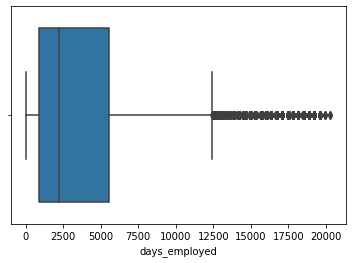

In [62]:
import seaborn as sns
sns.boxplot(df_drop['days_employed'])

In [63]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusan Anda) berdasarkan parameter yang Anda identifikasi
def day_employed_isna(row):
    age_group = row['age_group']
    day_employed = row['days_employed']
    if day_employed == 0:
        if age_group == 'muda':
            return 796.5
        if age_group == 'paruh baya':
            return 1857
        if age_group == 'pekerja awal':
            return 1326
        if age_group == 'pensiun':
            return 14596
        if age_group == 'pra pensiun':
            return 2637
    return day_employed

In [64]:
# Periksa apakah fungsi Anda dapat bekerja
test_data7 = {'age_group' : ['muda','pensiun','pekerja awal','pra pensiun','paruh baya'], 
              'days_employed' : [0,21,0, 50000, 0]}
test_data8 = pd.DataFrame(test_data7)
test_data8['days_employed'] = test_data8.apply(day_employed_isna, axis = 1)
test_data8.head()

,age_group,days_employed
0,muda,796.5
1,pensiun,21.0
2,pekerja awal,1326.0
3,pra pensiun,50000.0
4,paruh baya,1857.0


In [65]:
# Terapkan fungsi ke days_employed
df['days_employed'] = df.apply(day_employed_isna, axis = 1)


In [66]:
# Periksa apakah fungsi Anda bekerja
df[df['days_employed'] == 0]['days_employed'].count()


0

In [67]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21349 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21349 non-null  int64  
 1   days_employed     21349 non-null  float64
 2   dob_years         21349 non-null  int64  
 3   education         21349 non-null  object 
 4   education_id      21349 non-null  int64  
 5   family_status     21349 non-null  object 
 6   family_status_id  21349 non-null  int64  
 7   gender            21349 non-null  object 
 8   income_type       21349 non-null  object 
 9   debt              21349 non-null  int64  
 10  total_income      21349 non-null  float64
 11  purpose           21349 non-null  object 
 12  age_group         21349 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


## Pengkategorian Data

[Untuk menjawab pertanyaan dan menguji hipotesis, Anda akan bekerja dengan data yang telah dikategorikan. Lihatlah pertanyaan-pertanyaan yang diajukan kepada Anda dan yang harus Anda jawab. Pikirkan tentang data mana yang perlu dikategorikan untuk menjawab pertanyaan-pertanyaan ini. Di bawah ini, Anda akan menemukan templat yang bisa Anda gunakan untuk mengkategorikan data. Proses pertama mencakup data teks; yang kedua membahas data numerik yang perlu dikategorikan. Anda dapat menggunakan kedua petunjuk yang disarankan atau tidak sama sekali - semuanya terserah Anda.]

[Terlepas dari keputusan Anda untuk mengatasi pengkategorian, pastikan bahwa Anda secara lugas memberikan penjelasan tentang mengapa Anda membuat keputusan tersebut. Ingat: ini adalah pekerjaan Anda dan Andalah yang berhak membuat segala keputusan.]


In [68]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian
df['purpose'].drop_duplicates().reset_index(drop=True)


0                        purchase of the house
1                                 car purchase
2                      supplementary education
3                            to have a wedding
4                         housing transactions
5                                    education
6                             having a wedding
7          purchase of the house for my family
8                              buy real estate
9                   buy commercial real estate
10                 buy residential real estate
11                construction of own property
12                                    property
13                         building a property
14                    buying a second-hand car
15                           buying my own car
16    transactions with commercial real estate
17                      building a real estate
18                                     housing
19            transactions with my real estate
20                                        cars
21           

In [69]:
# Periksa nilai unik
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going


kelompok data berdasarkan type dan sebuah kata:

property = house, housing, real estate, property,

wedding = wedding

education = education,educated, university

car = car, cars

Note: untuk bagian yang ini saya betul tidak mengetahui bagaimana cara membuat fungsi nya, jadi saya melakukan nya secara manual. mungkin bisa di bantu jika nanti ada revisi

In [70]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
df['wedding'] = df['purpose'].str.contains('wedding').astype('string')
df.loc[df['wedding'] == 'True','purpose_type'] = 'wedding'
df['property'] = df['purpose'].str.contains('property|house|housing|real estate' ).astype('string')
df.loc[df['property'] == 'True','purpose_type'] = 'property'
df['edu'] = df['purpose'].str.contains('education|educated|university').astype('string')
df.loc[df['edu'] == 'True','purpose_type'] = 'education'
df['car'] = df['purpose'].str.contains('car|cars').astype('string')
df.loc[df['car'] == 'True','purpose_type'] = 'car'
df = df.drop(columns = ['wedding','property','car','edu'])

In [71]:
# test fungsi

In [72]:
# Buat kolom yang memuat kategori dan hitung nilainya
df['purpose_type'].value_counts()

property     10761
car           4284
education     3994
wedding       2310
Name: purpose_type, dtype: int64

In [73]:
# Lihat semua data numerik di kolom yang Anda pilih untuk pengkategorian
category_numerik = df['total_income']

In [74]:
# Dapatkan kesimpulan statistik untuk kolomnya
category_numerik.describe()


count     21349.000000
mean      26450.026277
std       15708.540771
min        3306.762000
25%       17222.988000
50%       23657.794500
75%       31325.325000
max      362496.645000
Name: total_income, dtype: float64


kelompok data :

pendapatan rendah : pendapatan kurang dari sama dengan 17251
pendepatan sedang : pendapatan lebih dari 17251 tetapi kurang dari 31278
pendapatan tinggi : pendapatan lebih dari 31278

dikarenakan dapat dilihat dari data category_music.describe() <25% = rendah , 25%-75% = sedang, >75% = tinggi

In [75]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def category_income(row):
    income = row['total_income']
    if income <= 17251 :
        return 'rendah'
    elif income > 31278 :
        return 'tinggi'
    return 'sedang'

In [76]:
#test fungsi
test_data20 = {'total_income' : [1600, 32000, 20000]}
test_data21 = pd.DataFrame(test_data20)
test_data21['category_income'] = test_data21.apply(category_income, axis = 1)
test_data21.head()

,total_income,category_income
0,1600,rendah
1,32000,tinggi
2,20000,sedang


In [77]:
# Buat kolom yang memuat kategori
df['category_income'] = df.apply(category_income,axis =1)


In [78]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
df['category_income'].value_counts()

sedang    10637
tinggi     5356
rendah     5356
Name: category_income, dtype: int64

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu?**

In [79]:
# Periksa data anak dan data pelunasan tepat waktu
tepat_waktu = df[df['debt'] == 0 ]
print(tepat_waktu.groupby('children')['debt'].count())
print()
# Hitung gagal bayar berdasarkan jumlah anak
print(df.groupby(['children'])['debt'].sum())


children
0    12961
1     4396
2     1912
3      301
4       37
5        9
Name: debt, dtype: int64

children
0    1058
1     442
2     202
3      27
4       4
5       0
Name: debt, dtype: int64


**Kesimpulan**


kesimpulan bahwa nasabah yang belum mempunyai anak memiliki persentase gagal bayar hampir 50%.


**Apakah terdapat korelasi antara status keluarga dengan pelunasan tepat waktu?**

In [80]:
# Periksa data status keluarga dan pelunasan tepat waktu
print(tepat_waktu.groupby('family_status')['debt'].count().sort_values(ascending=False))
print()
# Hitung gagal bayar berdasarkan status keluarga
print(df.groupby('family_status')['debt'].sum().sort_values(ascending=False))



family_status
married              11360
civil partnership     3743
unmarried             2521
divorced              1992
Name: debt, dtype: int64

family_status
married              927
civil partnership    386
unmarried            273
divorced             147
Name: debt, dtype: int64


**Kesimpulan**


kesimpulan bahwa nasabah yang sudah menikah memiliki tingkat gagal bayar tertinggi


**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

In [81]:
# Periksa data tingkat pendapatan dan pelunasan tepat waktu
print(tepat_waktu.groupby('category_income')['debt'].count().sort_values(ascending=False))

print()
# Hitung gagal bayar berdasarkan tingkat pendapatan
print(df.groupby('category_income')['debt'].sum().sort_values(ascending=False))



category_income
sedang    9714
tinggi    4971
rendah    4931
Name: debt, dtype: int64

category_income
sedang    923
rendah    425
tinggi    385
Name: debt, dtype: int64


**Kesimpulan**

kesimpulan bahwa nasabah yang memiliki tingkat pendapatan sedang, memiliki tingkat gagal bayar yang paling tinggi

**Bagaimana tujuan kredit memengaruhi tingkat gagal bayar?**

In [82]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
print(df.groupby('purpose_type')['debt'].sum().apply(lambda x: x/21423 * 100).sort_values(ascending=False))

percent_property = df[df['purpose_type'] == 'property']['debt'].sum()/df['debt'].count()
print(f'persentase gagal bayar untuk tujuan kredit properti : {percent_property:.0%}')
percent_car = df[df['purpose_type'] == 'car']['debt'].sum()/df['debt'].count()
print(f'persentase gagal bayar untuk tujuan kredit car : {percent_car:.0%}')
percent_education = df[df['purpose_type'] == 'education']['debt'].sum()/df['debt'].count()
print(f'persentase gagal bayar untuk tujuan kredit education : {percent_education:.0%}')
percent_wedding = df[df['purpose_type'] == 'wedding']['debt'].sum()/df['debt'].count()
print(f'persentase gagal bayar untuk tujuan kredit wedding : {percent_wedding:.0%}')


purpose_type
property     3.636279
car          1.867152
education    1.727116
wedding      0.858890
Name: debt, dtype: float64
persentase gagal bayar untuk tujuan kredit properti : 4%
persentase gagal bayar untuk tujuan kredit car : 2%
persentase gagal bayar untuk tujuan kredit education : 2%
persentase gagal bayar untuk tujuan kredit wedding : 1%


**Kesimpulan**


setelah dilakukan pengamatan, nasabah yang memiliki tipe tujuan property memiliki tingkat gagal bayar tertinggi di banding yang lain yaitu sebesasr 4%


# Kesimpulan umum 

Setelah melakukan indentifikasi pada data asli, diperlukan banyak sekalli perubahan pada data seperti:
1. Merubah type data
2. Mengganti nilai data yang sama
3. Menggisi nilai yang hilang
4. Menambah kolom baru dengan mengkategorikan beberapa nilai yang diperlukan.
5. Menghapus duplikat dan Menghapus data yang tidak di perlukan.

sampai pada data yang siap di analisa yang bisa kita buat kesimpulan terhadap tingkat gagal bayar nasabah terhadap beberapa kategori yang telah di buat sebelum nya.


Kesimpulan yang di dapat dari pertanyaan adalah:

Tingkat gagal bayar tertinggi adalah nasabah yang tidak memiliki anak 1058 nasabah, sudah menikah dengan 927 nasabah, memiliki penghasilan sedang 923 nasabah dan bertujuan untuk membeli properti 4% dari total keseluruhan data.
